# Customer Churn in Telecom

### 1) Importing Libraries

In [ ]:
# basic modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import statsmodels.formula.api as smf
import math
# To scale data
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
# For calculations
# import category_encoders as ce

# To split the data
from sklearn.model_selection import train_test_split
from sklearn import metrics
# To implement linear regression
from sklearn.linear_model import LinearRegression
# to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 2) Loading Dataset

In [ ]:
df1 = pd.read_csv('C:/Users/Aditya Shanbhag/Desktop/Customer Churn research/Churn_1.csv')

In [ ]:
df2 = pd.read_csv('C:/Users/Aditya Shanbhag/Desktop/Customer Churn research/Churn_2.csv')

In [ ]:
df1.shape

(3333, 14)

In [ ]:
df2.shape

(3333, 8)

#### Merging two datasets together

In [ ]:
df = pd.merge(df1, df2, how='inner', on = 'phone number')

In [ ]:
df

state  account length  area code phone number international plan  \
0       VT             101        510     413-7655                 no   
1       SD              98        415     392-2555                 no   
2       OK             127        510     403-1128                 no   
3       OH             134        415     406-4158                 no   
4       WI              70        415     405-9233                 no   
...    ...             ...        ...          ...                ...   
3328    WI              89        415     373-4264                 no   
3329    DE             129        510     332-6181                 no   
3330    MD              93        408     360-3324                yes   
3331    NJ              88        415     347-8659                 no   
3332    MO             112        415     373-2053                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                 no                      0                0.0   
1                 no                      0                0.0   
2                yes                     27                2.6   
3                 no                      0                7.8   
4                 no                      0                7.9   
...              ...                    ...                ...   
3328              no                      0              504.0   
3329              no                      0              509.0   
3330              no                      0              592.0   
3331              no                      0              566.0   
3332              no                      0              531.0   

      total day calls  total day charge  ...  total eve calls  \
0                   0              0.00  ...            119.0   
1                   0              0.00  ...            130.0   
2                 113              0.44  ...            102.0   
3                  86              1.33  ...            100.0   
4                 100              1.34  ...             83.0   
...               ...               ...  ...              ...   
3328              112             55.47  ...            110.0   
3329              118             56.83  ...            104.0   
3330              109             53.04  ...            100.0   
3331              136             51.26  ...             72.0   
3332               77             57.04  ...            109.0   

      total eve charge  churn  total night minutes  total night calls  \
0                16.33      0                168.8                 95   
1                13.57      1                167.1                 88   
2                21.59      0                242.7                156   
3                14.57      0                186.5                 80   
4                11.59      0                156.6                 89   
...                ...    ...                  ...                ...   
3328             14.03      1                162.9                 97   
3329             16.33      1                191.0                 83   
3330             11.00      1                217.6                 74   
3331             21.90      1                132.9                118   
3332             18.06      1                265.0                132   

      total night charge  total intl minutes  total intl calls  \
0                   7.60                 7.2                 4   
1                   7.52                 6.8                 1   
2                  10.92                 9.2                 5   
3                   8.39                12.9                 2   
4                   7.05                12.1                 1   
...                  ...                 ...               ...   
3328                7.33                 7.5                 1   
3329                8.59                10.4                 6   
3330                9.79                10.5                 2   
3331             

#### Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3252 non-null   float64
 12  total eve charge        3333 non-null   float64
 13  churn                   3333 non-null   int64  
 14  total night minutes     3333 non-null   

#### Check for Null Values

In [ ]:
df.isnull().sum()

state                      0
account length             0
area code                  0
phone number               0
international plan         0
voice mail plan            0
number vmail messages      0
total day minutes          0
total day calls            0
total day charge           0
total eve minutes          0
total eve calls           81
total eve charge           0
churn                      0
total night minutes        0
total night calls          0
total night charge         0
total intl minutes         0
total intl calls           0
total intl charge          0
customer service calls     0
dtype: int64

<b>INFERENCE</b> - There are 81 null values present in total_eve_charge column.

#### Check for Duplicate Values

In [ ]:
df.duplicated().sum()

0

<b>INFERENCE</b> - There are no duplicate values.

### 3) Exploratory Data Analysis

#### Summary Statistics

In [ ]:
df.describe().T

count        mean        std     min     25%     50%  \
account length          3333.0  101.064806  39.822106    1.00   74.00  101.00   
area code               3333.0  437.182418  42.371290  408.00  408.00  415.00   
number vmail messages   3333.0    8.099010  13.688365    0.00    0.00    0.00   
total day minutes       3333.0  182.085539  64.492446    0.00  143.70  179.40   
total day calls         3333.0  100.435644  20.069084    0.00   87.00  101.00   
total day charge        3333.0   30.562307   9.259435    0.00   24.43   30.50   
total eve minutes       3333.0  200.980348  50.713844    0.00  166.60  201.40   
total eve calls         3252.0  101.065498  19.199523    0.00   88.00  101.00   
total eve charge        3333.0   17.083540   4.310668    0.00   14.16   17.12   
churn                   3333.0    0.144914   0.352067    0.00    0.00    0.00   
total night minutes     3333.0  200.872037  50.573847   23.20  167.00  201.20   
total night calls       3333.0  100.107711  19.568609   33.00   87.00  100.00   
total night charge      3333.0    9.039325   2.275873    1.04    7.52    9.05   
total intl minutes      3333.0   10.237294   2.791840    0.00    8.50   10.30   
total intl calls        3333.0    4.479448   2.461214    0.00    3.00    4.00   
total intl charge       3333.0    2.764581   0.753773    0.00    2.30    2.78   
customer service calls  3333.0    1.562856   1.315491    0.00    1.00    1.00   

                           75%     max  
account length          127.00  243.00  
area code               510.00  510.00  
number vmail messages    20.00   51.00  
total day minutes       216.40  600.00  
total day calls         114.00  165.00  
total day charge         36.79   59.64  
total eve minutes       235.30  363.70  
total eve calls         114.00  170.00  
total eve charge         20.00   30.91  
churn                     0.00    1.00  
total night minutes     235.30  395.00  
total night calls       113.00  175.00  
total night charge       10.59   17.77  
total intl minutes       12.10   20.00  
total intl calls          6.00   20.00  
total intl charge         3.27    5.40  
customer service calls    2.00    9.00

In [ ]:
df.describe(include='object').T

count unique       top  freq
state               3333     51        WV   106
phone number        3333   3333  366-4444     1
international plan  3333      2        no  3010
voice mail plan     3333      2        no  2411

In [ ]:
df.describe(include='all').T

count unique       top  freq      mean       std   min  \
state                   3333     51        WV   106       NaN       NaN   NaN   
account length          3333    NaN       NaN   NaN   101.065   39.8221     1   
area code               3333    NaN       NaN   NaN   437.182   42.3713   408   
phone number            3333   3333  366-4444     1       NaN       NaN   NaN   
international plan      3333      2        no  3010       NaN       NaN   NaN   
voice mail plan         3333      2        no  2411       NaN       NaN   NaN   
number vmail messages   3333    NaN       NaN   NaN   8.09901   13.6884     0   
total day minutes       3333    NaN       NaN   NaN   182.086   64.4924     0   
total day calls         3333    NaN       NaN   NaN   100.436   20.0691     0   
total day charge        3333    NaN       NaN   NaN   30.5623   9.25943     0   
total eve minutes       3333    NaN       NaN   NaN    200.98   50.7138     0   
total eve calls         3252    NaN       NaN   NaN   101.065   19.1995     0   
total eve charge        3333    NaN       NaN   NaN   17.0835   4.31067     0   
churn                   3333    NaN       NaN   NaN  0.144914  0.352067     0   
total night minutes     3333    NaN       NaN   NaN   200.872   50.5738  23.2   
total night calls       3333    NaN       NaN   NaN   100.108   19.5686    33   
total night charge      3333    NaN       NaN   NaN   9.03932   2.27587  1.04   
total intl minutes      3333    NaN       NaN   NaN   10.2373   2.79184     0   
total intl calls        3333    NaN       NaN   NaN   4.47945   2.46121     0   
total intl charge       3333    NaN       NaN   NaN   2.76458  0.753773     0   
customer service calls  3333    NaN       NaN   NaN   1.56286   1.31549     0   

                          25%    50%    75%    max  
state                     NaN    NaN    NaN    NaN  
account length             74    101    127    243  
area code                 408    415    510    510  
phone number              NaN    NaN    NaN    NaN  
international plan        NaN    NaN    NaN    NaN  
voice mail plan           NaN    NaN    NaN    NaN  
number vmail messages       0      0     20     51  
total day minutes       143.7  179.4  216.4    600  
total day calls            87    101    114    165  
total day charge        24.43   30.5  36.79  59.64  
total eve minutes       166.6  201.4  235.3  363.7  
total eve calls            88    101    114    170  
total eve charge        14.16  17.12     20  30.91  
churn                       0      0      0      1  
total night minutes       167  201.2  235.3    395  
total night calls          87    100    113    175  
total night charge       7.52   9.05  10.59  17.77  
total intl minutes        8.5   10.3   12.1     20  
total intl calls            3      4      6     20  
total intl charge         2.3   2.78   3.27    5.4  
customer service calls      1      1      2      9

<b>INFERENCE</b> - Descriptive statistics is about describing and summarizing data. It includes count, mean, standard deviation, minimum , maximum and Quartiles (Q1-25%, Q2-Median, Q3-75%).

### UNIVARIATE ANALYSIS

In [ ]:
df.skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes         1.742088
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.000804
total eve charge         -0.023858
churn                     2.018356
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
dtype: float64

<b>INFERENCE</b> - Skewness is a measure of the asymmetry of a distribution. A distribution can have right (or positive), left (or negative), or zero skewness.

<AxesSubplot:xlabel='account length'>

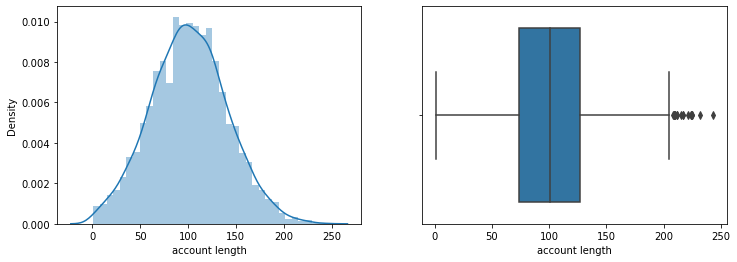

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['account length'])
plt.subplot(1,2,2)
sns.boxplot(df['account length'])

<b>INFERENCE</b> - This distribution is a slightly right skewed and is not normally distributed.

<AxesSubplot:xlabel='number vmail messages'>

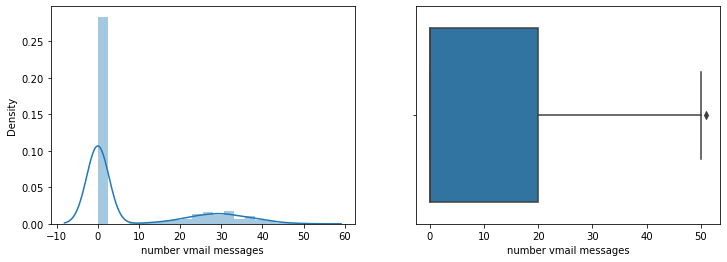

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['number vmail messages'])
plt.subplot(1,2,2)
sns.boxplot(df['number vmail messages'])

<b>INFERENCE</b> - This distribution is a right skewed and is not normally distributed.

<AxesSubplot:xlabel='total day minutes'>

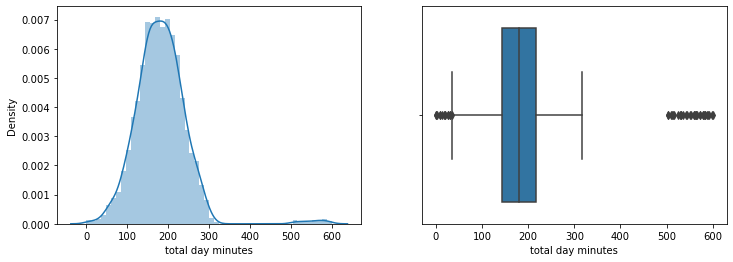

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total day minutes'])
plt.subplot(1,2,2)
sns.boxplot(df['total day minutes'])

<b>INFERENCE</b> - This distribution is a right skewed and is not normally distributed.

<AxesSubplot:xlabel='total day calls'>

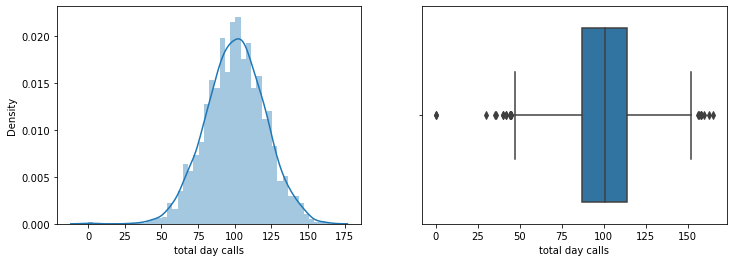

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total day calls'])
plt.subplot(1,2,2)
sns.boxplot(df['total day calls'])

<b>INFERENCE</b> - This distribution is a left skewed and is not normally distributed.

<AxesSubplot:xlabel='total day charge'>

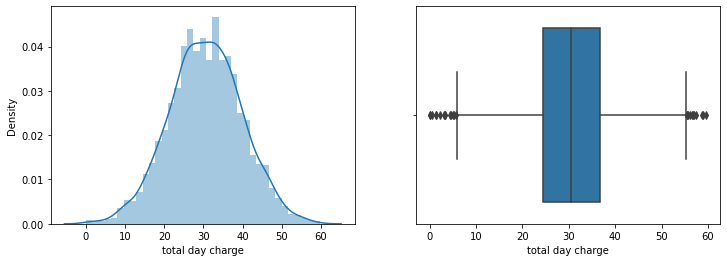

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total day charge'])
plt.subplot(1,2,2)
sns.boxplot(df['total day charge'])

<b>INFERENCE</b> - This distribution is a slightly left skewed and is not normally distributed.

<AxesSubplot:xlabel='total eve minutes'>

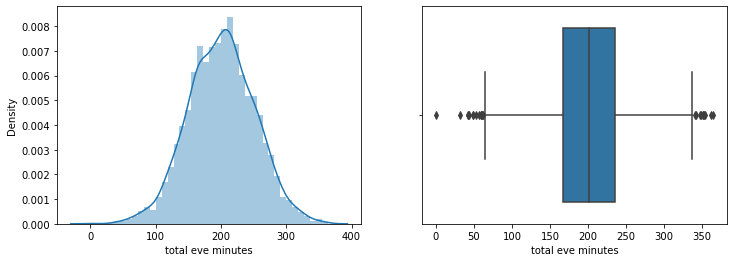

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total eve minutes'])
plt.subplot(1,2,2)
sns.boxplot(df['total eve minutes'])

<b>INFERENCE</b> - This distribution is a slightly left skewed and is not normally distributed.

<AxesSubplot:xlabel='total eve calls'>

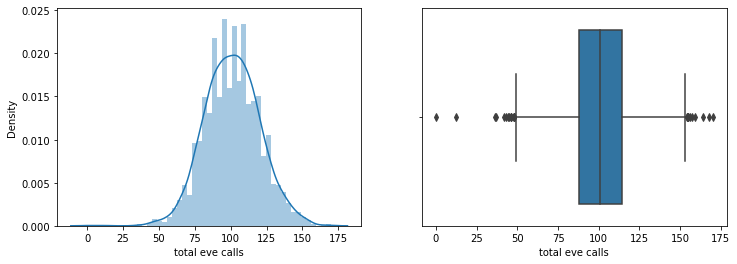

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total eve calls'])
plt.subplot(1,2,2)
sns.boxplot(df['total eve calls'])

<b>INFERENCE</b> - This distribution is a slightly left skewed and is not normally distributed.

<AxesSubplot:xlabel='total eve charge'>

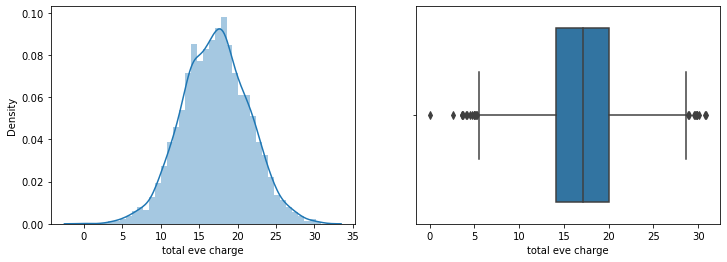

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total eve charge'])
plt.subplot(1,2,2)
sns.boxplot(df['total eve charge'])

<b>INFERENCE</b> - This distribution is a slightly left skewed and is not normally distributed.

<AxesSubplot:xlabel='total night minutes'>

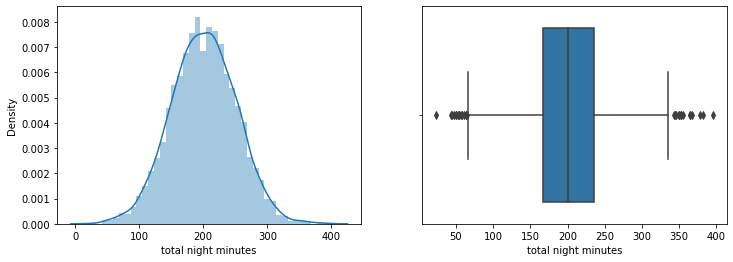

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total night minutes'])
plt.subplot(1,2,2)
sns.boxplot(df['total night minutes'])

<b>INFERENCE</b> - This distribution is a slightly right skewed and is not normally distributed.

<AxesSubplot:xlabel='total night calls'>

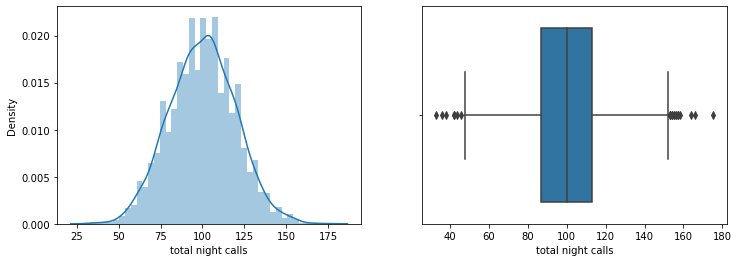

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total night calls'])
plt.subplot(1,2,2)
sns.boxplot(df['total night calls'])

<b>INFERENCE</b> - This distribution is a right skewed and is not normally distributed.

<AxesSubplot:xlabel='total night charge'>

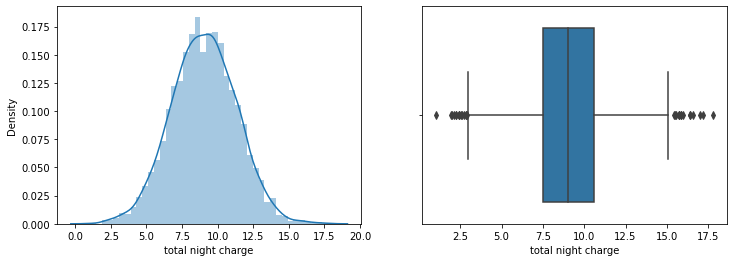

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total night charge'])
plt.subplot(1,2,2)
sns.boxplot(df['total night charge'])

<b>INFERENCE</b> - This distribution is a slightly right skewed and is not normally distributed.

<AxesSubplot:xlabel='total intl minutes'>

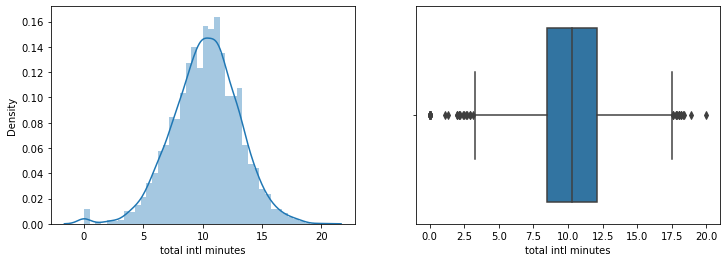

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total intl minutes'])
plt.subplot(1,2,2)
sns.boxplot(df['total intl minutes'])

<b>INFERENCE</b> - This distribution is a left skewed and is not normally distributed.

<AxesSubplot:xlabel='total intl calls'>

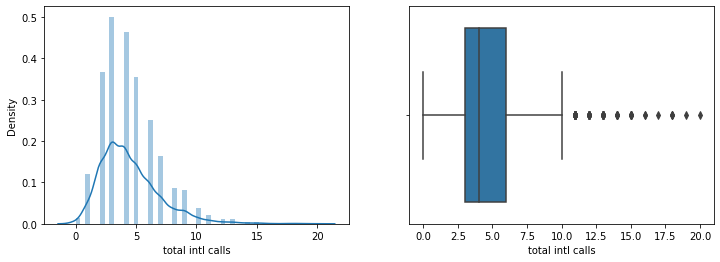

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total intl calls'])
plt.subplot(1,2,2)
sns.boxplot(df['total intl calls'])

<b>INFERENCE</b> - This distribution is a slightly right skewed and is not normally distributed.

<AxesSubplot:xlabel='total intl charge'>

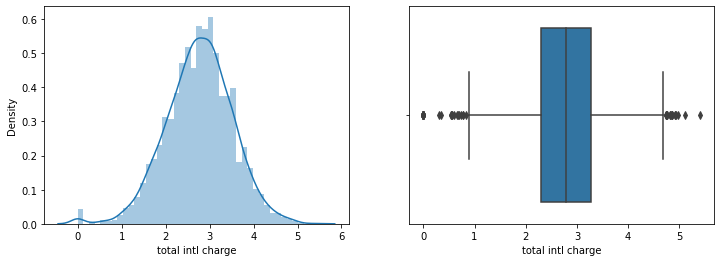

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['total intl charge'])
plt.subplot(1,2,2)
sns.boxplot(df['total intl charge'])

<b>INFERENCE</b> - This distribution is a left skewed and is not normally distributed.

<AxesSubplot:xlabel='customer service calls'>

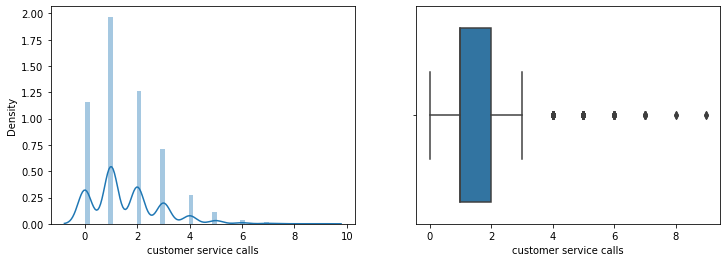

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df['customer service calls'])
plt.subplot(1,2,2)
sns.boxplot(df['customer service calls'])

<b>INFERENCE</b> - This distribution is a right skewed and is not normally distributed.

<AxesSubplot:xlabel='state', ylabel='count'>

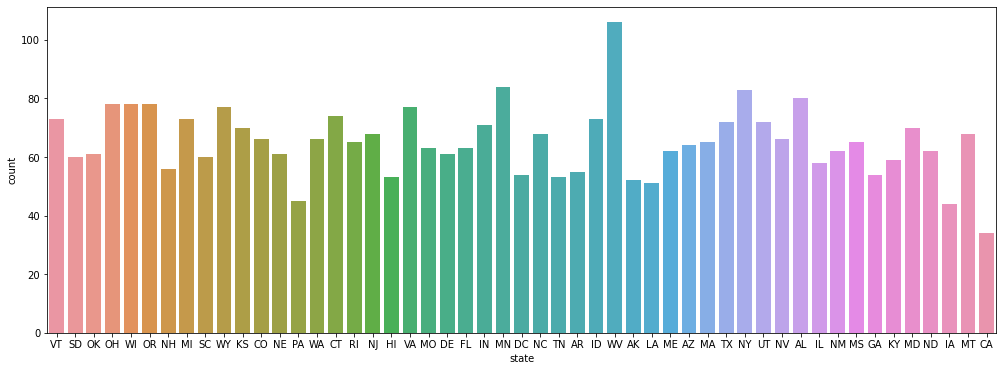

In [ ]:
plt.figure(figsize=(17,6))

sns.countplot(df['state'])

<b>INFERENCE</b> - We can see that West Virginia state has the highest count and California has the lowest count among all the states.

<AxesSubplot:xlabel='international plan', ylabel='count'>

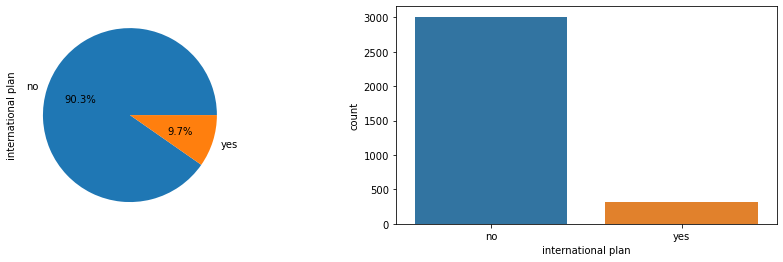

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
df['international plan'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['international plan'])

<b>INFERENCE</b> - We can conclude that 9.7% customers have opted for International Plan whereas 90.3% customers have not opted for International Plan.

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

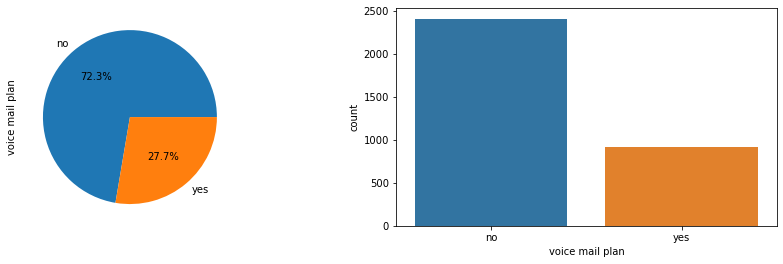

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
df['voice mail plan'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['voice mail plan'])

<b>INFERENCE</b> - we can conclude that 27.7% customers have opted for Voice Mail Plan whereas 72.3% customers have not opted for Voice Mail Plan.

### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='state', ylabel='Count'>

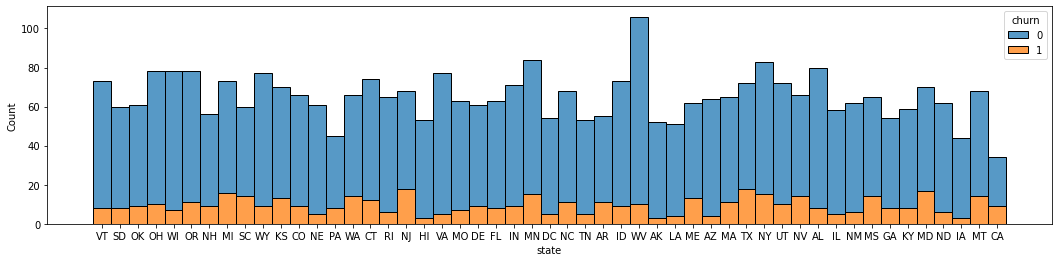

In [ ]:
plt.figure(figsize=(18,4))
sns.histplot(x="state", hue="churn", data=df, stat="count", multiple="stack")

<b>INFERENCE</b> - We can conclude that Texas state and New Jersey state has highest number of churn rate.

<AxesSubplot:xlabel='international plan', ylabel='Count'>

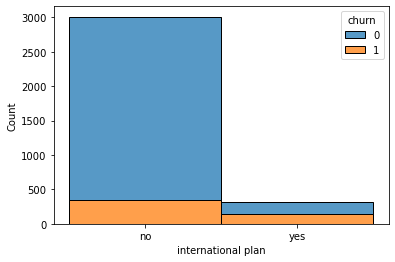

In [ ]:
sns.histplot(binwidth=0.05, x="international plan", hue="churn", data=df, stat="count", multiple="stack")

<b>INFERENCE</b> - We can conclude that customer who are opting international plan have more churn rate compared to those who have not opted for international plan.

<AxesSubplot:xlabel='voice mail plan', ylabel='Count'>

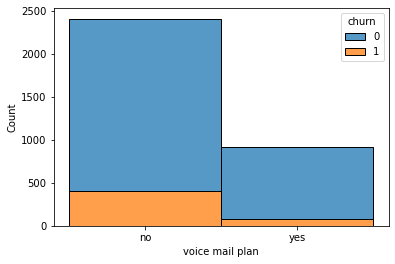

In [ ]:
sns.histplot(binwidth=0.05, x="voice mail plan", hue="churn", data=df, stat="count", multiple="stack")

<b>INFERENCE</b> - We can conclude that customer who have not opted for voice mail plan have more churn rate compared to those who have opted for voice mail plan.

### MULTIVARIATE ANALYSIS

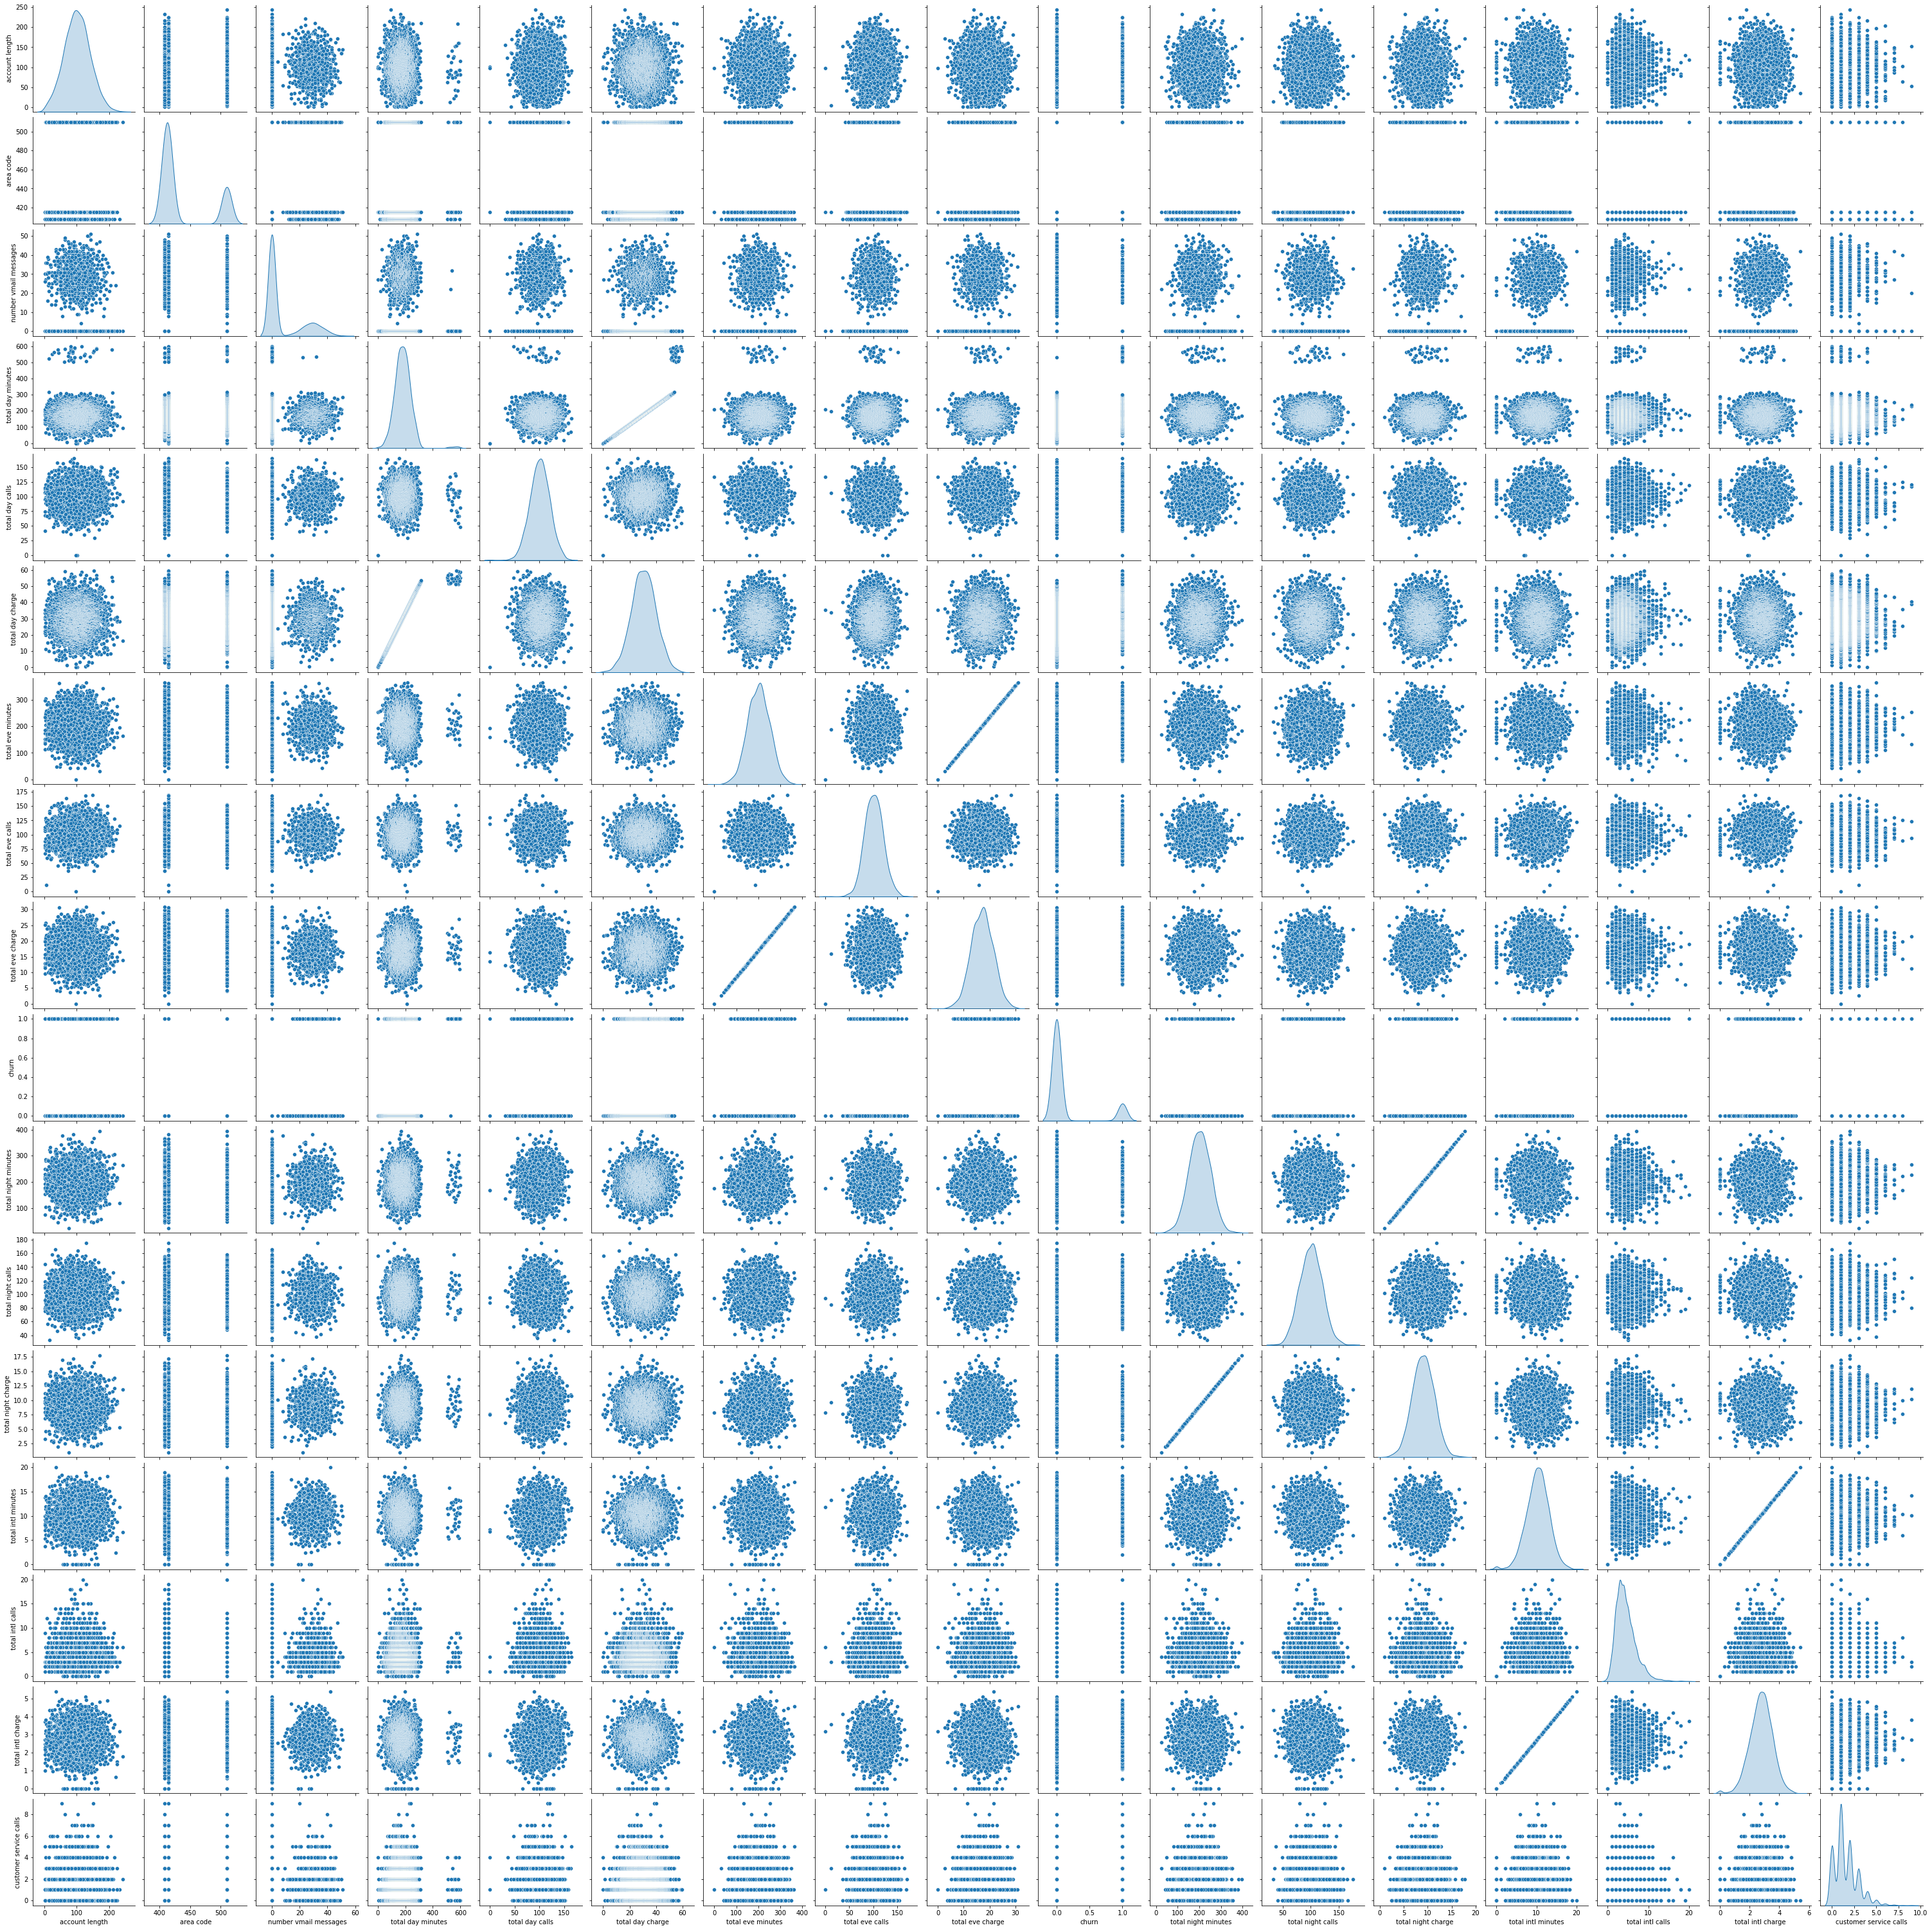

In [ ]:
# Bivariate analysis
sns.pairplot(df, diag_kind='kde')

<b>INFERENCE</b> - In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

### CORRELATION MATRIX (Using HeatMap)

<AxesSubplot:>

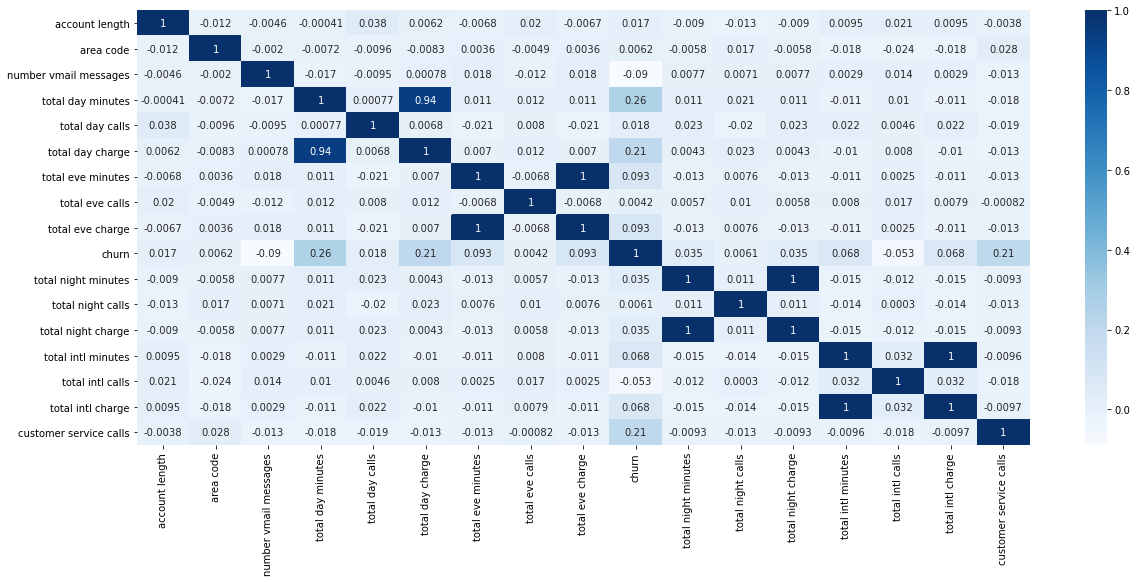

In [ ]:
# Correlation heatmap

plt.figure(figsize=(20,8))
sns.heatmap(data= df.corr(), annot= True, cmap='Blues')

<b>INFERENCE</b> - We can see that many multicollinearity is present in the heatmap.

### DATA CLEANING

Creating a copy of a data to avoid mistakes in future

In [ ]:
df_temp = df.copy()
df_temp

state  account length  area code phone number international plan  \
0       VT             101        510     413-7655                 no   
1       SD              98        415     392-2555                 no   
2       OK             127        510     403-1128                 no   
3       OH             134        415     406-4158                 no   
4       WI              70        415     405-9233                 no   
...    ...             ...        ...          ...                ...   
3328    WI              89        415     373-4264                 no   
3329    DE             129        510     332-6181                 no   
3330    MD              93        408     360-3324                yes   
3331    NJ              88        415     347-8659                 no   
3332    MO             112        415     373-2053                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                 no                      0                0.0   
1                 no                      0                0.0   
2                yes                     27                2.6   
3                 no                      0                7.8   
4                 no                      0                7.9   
...              ...                    ...                ...   
3328              no                      0              504.0   
3329              no                      0              509.0   
3330              no                      0              592.0   
3331              no                      0              566.0   
3332              no                      0              531.0   

      total day calls  total day charge  ...  total eve calls  \
0                   0              0.00  ...            119.0   
1                   0              0.00  ...            130.0   
2                 113              0.44  ...            102.0   
3                  86              1.33  ...            100.0   
4                 100              1.34  ...             83.0   
...               ...               ...  ...              ...   
3328              112             55.47  ...            110.0   
3329              118             56.83  ...            104.0   
3330              109             53.04  ...            100.0   
3331              136             51.26  ...             72.0   
3332               77             57.04  ...            109.0   

      total eve charge  churn  total night minutes  total night calls  \
0                16.33      0                168.8                 95   
1                13.57      1                167.1                 88   
2                21.59      0                242.7                156   
3                14.57      0                186.5                 80   
4                11.59      0                156.6                 89   
...                ...    ...                  ...                ...   
3328             14.03      1                162.9                 97   
3329             16.33      1                191.0                 83   
3330             11.00      1                217.6                 74   
3331             21.90      1                132.9                118   
3332             18.06      1                265.0                132   

      total night charge  total intl minutes  total intl calls  \
0                   7.60                 7.2                 4   
1                   7.52                 6.8                 1   
2                  10.92                 9.2                 5   
3                   8.39                12.9                 2   
4                   7.05                12.1                 1   
...                  ...                 ...               ...   
3328                7.33                 7.5                 1   
3329                8.59                10.4                 6   
3330                9.79                10.5                 2   
3331             

<b>Dealing with Missing Values</b>

In [ ]:
df_temp.isnull().sum()

state                      0
account length             0
area code                  0
phone number               0
international plan         0
voice mail plan            0
number vmail messages      0
total day minutes          0
total day calls            0
total day charge           0
total eve minutes          0
total eve calls           81
total eve charge           0
churn                      0
total night minutes        0
total night calls          0
total night charge         0
total intl minutes         0
total intl calls           0
total intl charge          0
customer service calls     0
dtype: int64

> 81 records are missing from the 'total eve calls' column

In [ ]:
for column in df_temp.columns:
    if df_temp[column].dtype != 'object':
        median = df_temp[column].median()
        df_temp[column] = df_temp[column].fillna(median)

df_temp.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
churn                     0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

> All the missing values are filled with median values

<b>Dropping Unique Columns</b>

In [ ]:
df_temp = df_temp.drop('state', axis=1)

In [ ]:
df_temp = df_temp.drop('phone number', axis=1)

In [ ]:
df_temp = df_temp.drop('area code', axis=1)

In [ ]:
df_temp

account length international plan voice mail plan  \
0                101                 no              no   
1                 98                 no              no   
2                127                 no             yes   
3                134                 no              no   
4                 70                 no              no   
...              ...                ...             ...   
3328              89                 no              no   
3329             129                 no              no   
3330              93                yes              no   
3331              88                 no              no   
3332             112                 no              no   

      number vmail messages  total day minutes  total day calls  \
0                         0                0.0                0   
1                         0                0.0                0   
2                        27                2.6              113   
3                         0                7.8               86   
4                         0                7.9              100   
...                     ...                ...              ...   
3328                      0              504.0              112   
3329                      0              509.0              118   
3330                      0              592.0              109   
3331                      0              566.0              136   
3332                      0              531.0               77   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                 0.00              192.1            119.0             16.33   
1                 0.00              159.6            130.0             13.57   
2                 0.44              254.0            102.0             21.59   
3                 1.33              171.4            100.0             14.57   
4                 1.34              136.4             83.0             11.59   
...                ...                ...              ...               ...   
3328             55.47              165.1            110.0             14.03   
3329             56.83              192.1            104.0             16.33   
3330             53.04              129.4            100.0             11.00   
3331             51.26              257.7             72.0             21.90   
3332             57.04              212.5            109.0             18.06   

      churn  total night minutes  total night calls  total night charge  \
0         0                168.8                 95                7.60   
1         1                167.1                 88                7.52   
2         0                242.7                156               10.92   
3         0                186.5                 80                8.39   
4         0                156.6                 89                7.05   
...     ...                  ...                ...                 ...   
3328      1                162.9                 97                7.33   
3329      1                191.0                 83                8.59   
3330      1                217.6                 74                9.79   
3331      1                132.9                118                5.98   
3332      1                265.0                132               11.93   

      total intl minutes  total intl calls  total intl charge  \
0                    7.2                 4               1.94   
1                    6.8                 1               1.84   
2                    9.2                 5               2.48   
3                   12.9                 2               3.48   
4                   12.1                 1               3.27   
...                  ...               ...                ...   
3328                 7.5                 1               2.03   
3329                10.4                 6               2.81   
3330                10.5                 2   

### TREATING THE OUTLIERS

<AxesSubplot:>

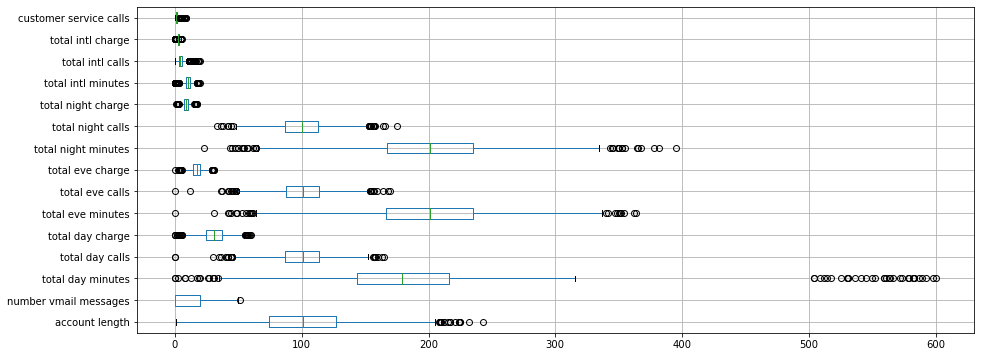

In [ ]:
plt.figure(figsize=(15,6))
df_temp1 = df_temp.drop('churn', axis=1)
df_temp1.boxplot(vert= 0)

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for i in df_temp1.columns:
    if df_temp1[i].dtypes != 'object':
        lw, uw = remove_outlier(df_temp1[i])
        df_temp1[i] = np.where(df_temp1[i] > uw, uw, df_temp1[i])
        df_temp1[i] = np.where(df_temp1[i] < lw, lw, df_temp1[i])

<AxesSubplot:>

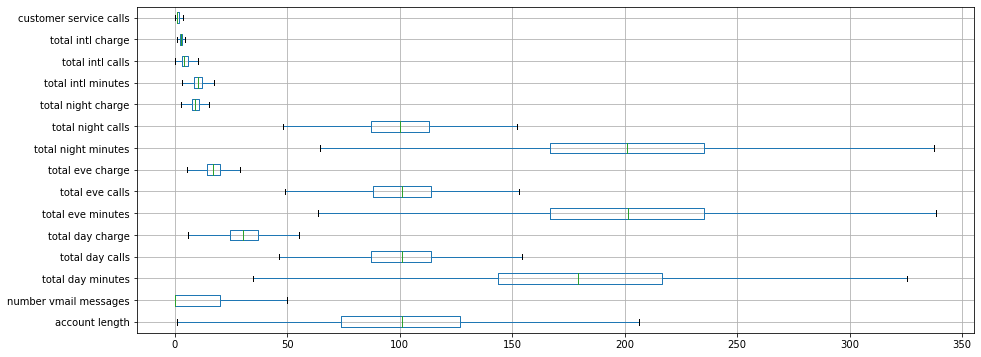

In [ ]:
plt.figure(figsize=(15,6))

df_temp1.boxplot(vert=0)

In [ ]:
df_temp1['churn']=df_temp['churn']

### Scaling the data

In this dataset for Linear Regression , Scaling is not required as the results are going to be same

In [ ]:
# Scaling the data
scale=StandardScaler()
df_temp2 = df_temp1.copy()
for i in df_temp1.columns:
    if df_temp2[i].dtypes != 'object':
        df_temp2[i] = scale.fit_transform(df_temp2[[i]])

In [ ]:
df_temp2.head()

account length international plan voice mail plan  number vmail messages  \
0       -0.000083                 no              no              -0.591778   
1       -0.075768                 no              no              -0.591778   
2        0.655850                 no             yes               1.381130   
3        0.832448                 no              no              -0.591778   
4       -0.782158                 no              no              -0.591778   

   total day minutes  total day calls  total day charge  total eve minutes  \
0          -2.672662        -2.717600         -2.681225          -0.176798   
1          -2.672662        -2.717600         -2.681225          -0.821719   
2          -2.672662         0.630711         -2.681225           1.051527   
3          -2.672662        -0.728753         -2.681225          -0.587563   
4          -2.672662        -0.023846         -2.681225          -1.282093   

   total eve calls  total eve charge  total night minutes  total night calls  \
0         0.955403         -0.176495            -0.639143          -0.262253   
1         1.542165         -0.820829            -0.673067          -0.622321   
2         0.048589          1.051475             0.835580           2.669725   
3        -0.058095         -0.587375            -0.285928          -1.033826   
4        -0.964909         -1.283069            -0.882602          -0.570882   

   total night charge  total intl minutes  total intl calls  \
0           -0.637455           -1.122759         -0.186990   
1           -0.672934           -1.269785         -1.507412   
2            0.834911           -0.387626          0.253150   
3           -0.287103            0.972369         -1.067271   
4           -0.881371            0.678316         -1.507412   

   total intl charge  customer service calls     churn  
0          -1.129350               -0.430249 -0.411672  
1          -1.265527                1.828050  2.429119  
2          -0.393990                1.376390 -0.411672  
3           0.967787                0.473071 -0.411672  
4           0.681814               -1.333569 -0.411672

<b>INFERENCE - </b> Scaling the data doesn't change the results from built models.Also, the dataset doesn't contain large values. Hence, it is inappropriate to scale the data.

### Handling categorical value

In [ ]:
dummy = pd.get_dummies(df_temp1, columns=['voice mail plan','international plan'])
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   float64
 1   number vmail messages   3333 non-null   float64
 2   total day minutes       3333 non-null   float64
 3   total day calls         3333 non-null   float64
 4   total day charge        3333 non-null   float64
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   float64
 7   total eve charge        3333 non-null   float64
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   float64
 10  total night charge      3333 non-null   float64
 11  total intl minutes      3333 non-null   float64
 12  total intl calls        3333 non-null   float64
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   

In [ ]:
dummy

account length  number vmail messages  total day minutes  \
0              101.0                    0.0              34.65   
1               98.0                    0.0              34.65   
2              127.0                   27.0              34.65   
3              134.0                    0.0              34.65   
4               70.0                    0.0              34.65   
...              ...                    ...                ...   
3328            89.0                    0.0             325.45   
3329           129.0                    0.0             325.45   
3330            93.0                    0.0             325.45   
3331            88.0                    0.0             325.45   
3332           112.0                    0.0             325.45   

      total day calls  total day charge  total eve minutes  total eve calls  \
0                46.5              5.89              192.1            119.0   
1                46.5              5.89              159.6            130.0   
2               113.0              5.89              254.0            102.0   
3                86.0              5.89              171.4            100.0   
4               100.0              5.89              136.4             83.0   
...               ...               ...                ...              ...   
3328            112.0             55.33              165.1            110.0   
3329            118.0             55.33              192.1            104.0   
3330            109.0             53.04              129.4            100.0   
3331            136.0             51.26              257.7             72.0   
3332             77.0             55.33              212.5            109.0   

      total eve charge  total night minutes  total night calls  \
0                16.33                168.8               95.0   
1                13.57                167.1               88.0   
2                21.59                242.7              152.0   
3                14.57                186.5               80.0   
4                11.59                156.6               89.0   
...                ...                  ...                ...   
3328             14.03                162.9               97.0   
3329             16.33                191.0               83.0   
3330             11.00                217.6               74.0   
3331             21.90                132.9              118.0   
3332             18.06                265.0              132.0   

      total night charge  total intl minutes  total intl calls  \
0                   7.60                 7.2               4.0   
1                   7.52                 6.8               1.0   
2                  10.92                 9.2               5.0   
3                   8.39                12.9               2.0   
4                   7.05                12.1               1.0   
...                  ...                 ...               ...   
3328                7.33                 7.5               1.0   
3329                8.59                10.4               6.0   
3330                9.79                10.5               2.0   
3331                5.98                13.4               2.0   
3332               11.93                12.7               8.0   

      total intl charge  customer service calls  churn  voice mail plan_no  \
0                  1.94                     1.0      0                   1   
1                  1.84                     3.5      1                   1   
2                  2.48                     3.0      0                   0   
3                  3.48                     2.0      0                   1   
4                  3.27                     0.0      0                   1   
...                 ...                     ...    ...                 ...   
3328               2.03                     1.0      1                   1   
3329               2.81                     0.0      1

<b>INFERENCE - </b> All the categorical values are converted to numerical values.

### BUILDING MODELS

In [ ]:
# creating a list to append the results of all the models
model_score_list = []

In [ ]:
# creating a function to calculate all the required values
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

In [ ]:
#Regression model
# Copy all the predictor variables into X dataframe
X = dummy.drop('churn', axis=1)

# Copy target into the y dataframe.
y = dummy[['churn']]

In [ ]:
#‘sklearn’ library - Split 30-70
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### LINEAR REGRESSION

<b>Sklearn library</b>

In [ ]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for account length is 0.00025113821014781124
The coefficient for number vmail messages is 0.0015540740872859076
The coefficient for total day minutes is 0.03691753374830022
The coefficient for total day calls is 9.591688609680705e-05
The coefficient for total day charge is -0.21044597870721718
The coefficient for total eve minutes is 0.11409883939986276
The coefficient for total eve calls is -0.00010379856392618362
The coefficient for total eve charge is -1.3354333050478777
The coefficient for total night minutes is -0.06992327750648285
The coefficient for total night calls is 0.0001761652935419725
The coefficient for total night charge is 1.5610225561944193
The coefficient for total intl minutes is -0.3812777833912054
The coefficient for total intl calls is -0.009729510072001324
The coefficient for total intl charge is 1.4365071264452627
The coefficient for customer service calls is 0.04857738794504026
The coefficient for voice mail plan_no is 0.06433692574855114
The c

In [ ]:
# Let us check the intercept for the model

intercept = reg_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.3230819226324362


In [ ]:
reg_model.score(X_train, y_train)

0.16019207481308728

In [ ]:
reg_model.score(X_test, y_test)

0.21579668313581013

<u>RMSE for training data</u>

In [ ]:
#RMSE on Training data
predicted_train=reg_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.31896387801829357

<b>INFERENCE </b> - R-SQUARE VALUE of Training data - <b>0.1594</b> and R-SQUARE VALUE of Training data -<b>0.2007</b>

Since its R-Square value is less that 0.7 therefore Linear Regression is not a good fit model.

<b>Statsmodel library</b>

In [ ]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test,y_test],axis=1)
data_train.head()
data_test.head()

account length  number vmail messages  total day minutes  \
2360            41.0                    0.0              209.9   
600             55.0                   45.0              130.5   
1501           127.0                   25.0              173.0   
1114            83.0                   41.0              155.9   
517            114.0                   32.0              125.2   

      total day calls  total day charge  total eve minutes  total eve calls  \
2360            105.0             35.68              121.9            105.0   
600             114.0             22.19              208.4             94.0   
1501             91.0             29.41              245.8             64.0   
1114            122.0             26.50              162.3            107.0   
517              79.0             21.28              177.8            105.0   

      total eve charge  total night minutes  total night calls  \
2360             10.36                253.7              104.0   
600              17.71                141.6              114.0   
1501             20.89                300.0               99.0   
1114             13.80                127.6              105.0   
517              15.11                232.4               89.0   

      total night charge  total intl minutes  total intl calls  \
2360               11.42                 9.6               4.0   
600                 6.37                11.0               5.0   
1501               13.50                 4.8               3.0   
1114                5.74                13.1               5.0   
517                10.46                12.9               3.0   

      total intl charge  customer service calls  voice mail plan_no  \
2360               2.59                     1.0                   1   
600                2.97                     3.5                   0   
1501               1.30                     0.0                   0   
1114               3.54                     3.0                   0   
517                3.48                     1.0                   0   

      voice mail plan_yes  international plan_no  international plan_yes  \
2360                    0                      1                       0   
600                     1                      1                       0   
1501                    1                      1                       0   
1114                    1                      1                       0   
517                     1                      1                       0   

      churn  
2360      0  
600       1  
1501      0  
1114      0  
517       0

In [ ]:
data_train.rename(columns = {"account length": "account_length", "number vmail messages": "number_vmail_messages", "total day minutes": "total_day_minutes" , "total day calls": "total_day_calls" , "total day charge": "total_day_charge" , "total eve minutes": "total_eve_minutes" , "total eve calls": "total_eve_calls" , "total eve charge": "total_eve_charge" , "total night minutes": "total_night_minutes" , "total night calls": "total_night_calls" , "total night charge": "total_night_charge" , "total intl minutes": "total_intl_minutes" , "total intl calls": "total_intl_calls" , "total intl charge": "total_intl_charge" , "customer service calls": "customer_service_calls" , "voice mail plan_no": "voice_mail_plan_no" , "voice mail plan_yes": "voice_mail_plan_yes" , "international plan_no": "international_plan_no" , "international plan_yes": "international_plan_yes"}, inplace = True)
data_test.rename(columns = {"account length": "account_length", "number vmail messages": "number_vmail_messages", "total day minutes": "total_day_minutes" , "total day calls": "total_day_calls" , "total day charge": "total_day_charge" , "total eve minutes": "total_eve_minutes" , "total eve calls": "total_eve_calls" , "total eve charge": "total_eve_charge" , "total night minutes": "total_night_minutes" , "total night calls": "total_night_calls" , "total night charge": "total_night_charge" , "total intl minutes": "total_intl_minutes" , "total intl calls": "total_intl_calls" , "total intl charge": "total_intl_charge" , "customer service calls": "customer_service_calls" , "voice mail plan_no": "voice_mail_plan_no" , "voice mail plan_yes": "voice_mail_plan_yes" , "international plan_no": "international_plan_no" , "international plan_yes": "international_plan_yes"}, inplace = True)

In [ ]:
form = "churn ~ account_length + number_vmail_messages + total_day_minutes + total_day_calls + total_day_charge + total_eve_minutes + total_eve_calls + total_eve_charge + total_night_minutes + total_night_calls + total_night_charge + total_intl_minutes + total_intl_calls + total_intl_charge + customer_service_calls + voice_mail_plan_no + voice_mail_plan_yes + international_plan_no + international_plan_yes"

In [ ]:
lm = smf.ols(formula= form, data = data_train).fit()


In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     29.71
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           8.70e-88
Time:                        18:40:28   Log-Likelihood:                -736.51
No. Observations:                2666   AIC:                             1509.
Df Residuals:                    2648   BIC:                             1615.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

<b>CHECKING FOR MULTICOLLINEARITY</b>

In [ ]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [ ]:
i=0
for column in X.columns:
    if i < 21:
        print (column ,"--->",  vif[i])
        i = i+1

account length ---> 1.0069551192286081
number vmail messages ---> 11.910302169618456
total day minutes ---> 2222.0702611455
total day calls ---> 1.006197487323278
total day charge ---> 2222.1477516474074
total eve minutes ---> 2217462.957480595
total eve calls ---> 1.0023874303741418
total eve charge ---> 2217463.6185807358
total night minutes ---> 596122.2062585166
total night calls ---> 1.004008936936428
total night charge ---> 596121.290238488
total intl minutes ---> 62631.526458886736
total intl calls ---> 1.0037162571875857
total intl charge ---> 62631.12069558335
customer service calls ---> 1.0028101175610942
voice mail plan_no ---> inf
voice mail plan_yes ---> inf
international plan_no ---> inf
international plan_yes ---> inf


<b>INFERENCE</b> - Since multicollinearity of some variables are > 5, we intend to merge certain columns to reduce it

In [ ]:
dummy['Avg_day_charge'] = dummy['total day charge']/dummy['total day minutes']
dummy['Avg_eve_charge'] = dummy['total eve charge']/dummy['total eve minutes']
dummy['Avg_night_charge'] = dummy['total night charge']/dummy['total night minutes']
dummy['Avg_intl_charge'] = dummy['total intl charge']/dummy['total intl minutes']

In [ ]:
#Drop all the unnecessary columns
dummy.drop(['total day charge','total day minutes', 'total eve charge', 'total eve minutes', 'total night charge', 'total night minutes','total intl charge','total intl minutes' ],axis = 1, inplace= True )

In [ ]:
dummy

account length  number vmail messages  total day calls  total eve calls  \
0              101.0                    0.0             46.5            119.0   
1               98.0                    0.0             46.5            130.0   
2              127.0                   27.0            113.0            102.0   
3              134.0                    0.0             86.0            100.0   
4               70.0                    0.0            100.0             83.0   
...              ...                    ...              ...              ...   
3328            89.0                    0.0            112.0            110.0   
3329           129.0                    0.0            118.0            104.0   
3330            93.0                    0.0            109.0            100.0   
3331            88.0                    0.0            136.0             72.0   
3332           112.0                    0.0             77.0            109.0   

      total night calls  total intl calls  customer service calls  churn  \
0                  95.0               4.0                     1.0      0   
1                  88.0               1.0                     3.5      1   
2                 152.0               5.0                     3.0      0   
3                  80.0               2.0                     2.0      0   
4                  89.0               1.0                     0.0      0   
...                 ...               ...                     ...    ...   
3328               97.0               1.0                     1.0      1   
3329               83.0               6.0                     0.0      1   
3330               74.0               2.0                     0.0      1   
3331              118.0               2.0                     3.5      1   
3332              132.0               8.0                     2.0      1   

      voice mail plan_no  voice mail plan_yes  international plan_no  \
0                      1                    0                      1   
1                      1                    0                      1   
2                      0                    1                      1   
3                      1                    0                      1   
4                      1                    0                      1   
...                  ...                  ...                    ...   
3328                   1                    0                      1   
3329                   1                    0                      1   
3330                   1                    0                      0   
3331                   1                    0                      1   
3332                   1                    0                      1   

      international plan_yes  Avg_day_charge  Avg_eve_charge  \
0                          0        0.169986        0.085008   
1                          0        0.169986        0.085025   
2                          0        0.169986        0.085000   
3                          0        0.169986        0.085006   
4                          0        0.169986        0.084971   
...                      ...             ...             ...   
3328                       0        0.170011        0.084979   
3329                       0        0.170011        0.085008   
3330                       1        0.162974        0.085008   
3331                       0        0.157505        0.084983   
3332                       0        0.170011        0.084988   

      Avg_night_charge  Avg_intl_charge  
0             0.045024         0.269444  
1             0.045003         0.270588  
2             0.044994         0.269565  
3             0.044987         0.269767  
4             0.045019         0.270248  
...                ...              ...  
3328          0.044997         0.270667  
3329          0.044974         0.270192  
3330          0.044991         0.270476  
3331          0.044996         0.270149  
3332          0.045019  

<b>CHECKING FOR MULTICOLLINEARITY AFTER MERGING COLUMNS</b>

In [ ]:
# Copy all the predictor variables into X dataframe
X = dummy.drop('churn', axis=1)

# Copy target into the y dataframe.
y = dummy[['churn']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [ ]:
i=0
for column in X.columns:
    if i < 28:
        print (column ,"--->",  vif[i])
        i = i+1

account length ---> 1.006911252806297
number vmail messages ---> 11.912956843566423
total day calls ---> 1.0045772860445783
total eve calls ---> 1.0021459561443762
total night calls ---> 1.0027257376199268
total intl calls ---> 1.0054079436089145
customer service calls ---> 1.002739924156888
voice mail plan_no ---> inf
voice mail plan_yes ---> inf
international plan_no ---> inf
international plan_yes ---> inf
Avg_day_charge ---> 1.0068444921378272
Avg_eve_charge ---> 1.001562327588218
Avg_night_charge ---> 1.003736275099773
Avg_intl_charge ---> 1.0057802760780399


<b>INFERENCE</b> - Now we can observe that multicollinearity values for all the variables is less than 5, except for the 'number vmail messages' variable.

### MODEL 2 - RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#import category_encoders as ce
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV,cross_val_score


In [ ]:
Model1 = RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
Model1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_1 = Model1.predict(X_test)

In [ ]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred_1)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  87.1
ROC AUC score :  59.77
Precision score :  72.09
Recall score :  20.95


<b>INFERENCE</b> - Accuracy score of the Random Forest Classifier is <b> 87.1 </b> .

### MODEL 3 - LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

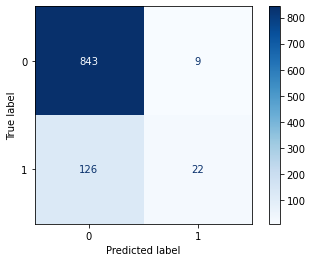

In [ ]:
con_metrix = metrics.plot_confusion_matrix(reg, X_test, y_test, cmap = 'Blues')

In [ ]:
y_pred_2 = reg.predict(X_test)

In [ ]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred_2)
# add the model scores to score list
model_score_list.append({'model_name':'Logistic regression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  86.5
ROC AUC score :  56.9
Precision score :  70.97
Recall score :  14.86


<b>INFERENCE</b> - Accuracy score of the Logistic Regression is <b> 86.5 </b> .

### MODEL 4 - DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
#Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_3 = clf.predict(X_test)

In [ ]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred_3)
# add the model scores to score list
model_score_list.append({'model_name':'DecissionTreeClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  79.4
ROC AUC score :  60.83
Precision score :  31.87
Recall score :  34.46


<b>INFERENCE</b> - Accuracy score of the Decision Tree Classifier is <b> 79.3 </b> .

### MODEL 5 - K NEAREST NEIGHBOUR (KNN) CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_4 = knn.predict(X_test)

In [ ]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred_4)
# add the model scores to score list
model_score_list.append({'model_name':'k-nearest neighbor Classifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  84.9
ROC AUC score :  50.66
Precision score :  33.33
Recall score :  2.03


<b>INFERENCE</b> - Accuracy score of the K Nearest Neighbors Classifier is <b> 84.9 </b> .

In [ ]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])
# Order by highest acc_score and roc_score
model_score_df.sort_values(['acc_score','roc_score'], ascending=False)

model_name  acc_score  roc_score  precision_score  \
0         RandomForestClassifier       87.1      59.77            72.09   
1            Logistic regression       86.5      56.90            70.97   
3  k-nearest neighbor Classifier       84.9      50.66            33.33   
2        DecissionTreeClassifier       79.4      60.83            31.87   

   recall_score  
0         20.95  
1         14.86  
3          2.03  
2         34.46

<b>OBSERVATIONS - </b>

- We can observe that random forest classifier has come up with 87.1% of accuracy compared to other models.
- Also the reason behind decision tree classifier showing poor accuracy score is due to the less number of predictors or variables available from the dataset.

------------------------------------------------------------------------ THE END ------------------------------------------------------------------------